In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pipeline as pl

OUTCOME_VAR = 'SeriousDlqin2yrs'
INDEX_COL = 0

%matplotlib inline

# Read in data and generate summary statistics

In [3]:
df = pl.read_data('cs-training.csv', INDEX_COL)

In [4]:
# pl.explore_data(df)

# Split data into test-train sets

In [5]:
cols = list(df.columns)
features = [x for x in cols if x != OUTCOME_VAR]

In [6]:
X_train, X_test, y_train, y_test = pl.split_train_test(df, features, OUTCOME_VAR, .2)

# Fill null values with means & transform features


In [7]:
v = pl.fill_train_na_mean(X_train)

In [8]:
pl.fill_test_na_mean(X_test,v)

In [9]:
pl.transform_squared(X_train, 'age', features)
pl.transform_squared(X_test, 'age', features)

In [10]:
pl.transform_log(X_train, 'MonthlyIncome', features, amt_to_add=1)
pl.transform_log(X_test, 'MonthlyIncome', features, amt_to_add=1)


# Generate histograms

In [11]:
for c in features:
   pl.make_hist(X_train, c, 10)

Plotting RevolvingUtilizationOfUnsecuredLines
Plotting age
Plotting NumberOfTime30-59DaysPastDueNotWorse
Plotting DebtRatio
Plotting MonthlyIncome
Plotting NumberOfOpenCreditLinesAndLoans
Plotting NumberOfTimes90DaysLate
Plotting NumberRealEstateLoansOrLines
Plotting NumberOfTime60-89DaysPastDueNotWorse
Plotting NumberOfDependents
Plotting age_sq
Plotting MonthlyIncome_log


# Fit and test a bunch of classifiers and parameters

In [12]:
clfs,grid = pl.define_clfs_params()

In [13]:
clfs_to_try = ['LR', 'DT', 'KNN', 'AB', 'RF']

###
LR
###

Time: 74s
Accuracy: 0.93
ROC/AUC Score: 0.52
Classication Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     27960
          1       0.57      0.04      0.07      2040

avg / total       0.91      0.93      0.90     30000




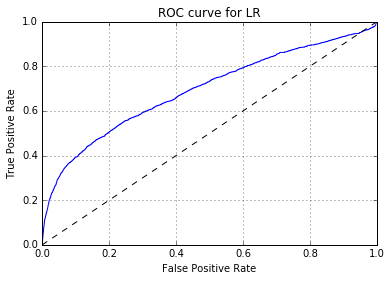

###
DT
###

Time: 64s
Accuracy: 0.93
ROC/AUC Score: 0.57
Classication Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     27960
          1       0.54      0.15      0.23      2040

avg / total       0.91      0.93      0.92     30000




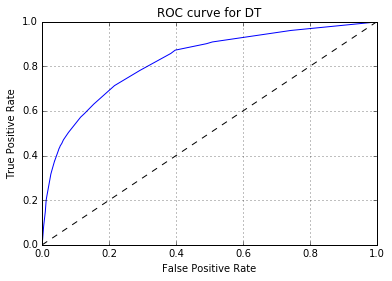

###
KNN
###

Time: 327s
Accuracy: 0.93
ROC/AUC Score: 0.5
Classication Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96     27960
          1       0.75      0.00      0.01      2040

avg / total       0.92      0.93      0.90     30000




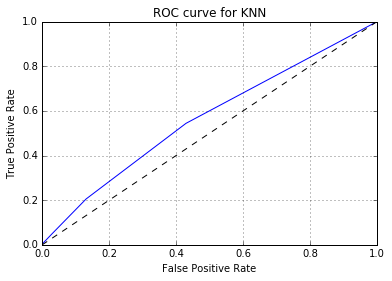

###
AB
###

Time: 60s
Accuracy: 0.94
ROC/AUC Score: 0.61
Classication Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     27960
          1       0.58      0.23      0.33      2040

avg / total       0.92      0.94      0.92     30000




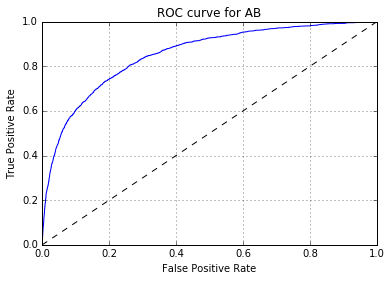

###
RF
###

Time: 206s
Accuracy: 0.94
ROC/AUC Score: 0.58
Classication Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     27960
          1       0.61      0.16      0.26      2040

avg / total       0.92      0.94      0.92     30000




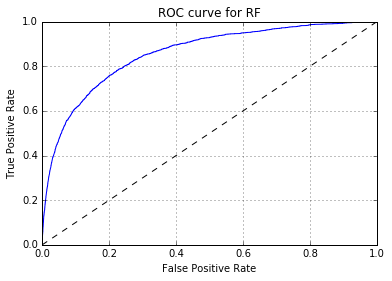

In [14]:
results = pl.try_models(clfs_to_try,clfs,grid, X_train, y_train, X_test, y_test)

# Print out a metrics report

###
KNN
###

Time: 327s
Accuracy: 0.93
ROC/AUC Score: 0.5
Classication Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96     27960
          1       0.75      0.00      0.01      2040

avg / total       0.92      0.93      0.90     30000




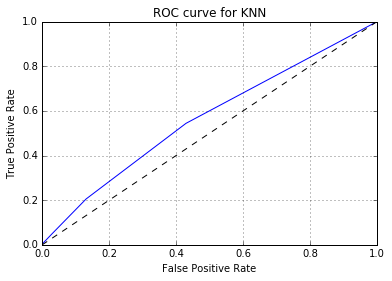

###
DT
###

Time: 64s
Accuracy: 0.93
ROC/AUC Score: 0.57
Classication Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     27960
          1       0.54      0.15      0.23      2040

avg / total       0.91      0.93      0.92     30000




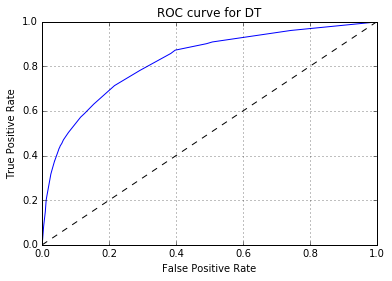

###
LR
###

Time: 74s
Accuracy: 0.93
ROC/AUC Score: 0.52
Classication Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     27960
          1       0.57      0.04      0.07      2040

avg / total       0.91      0.93      0.90     30000




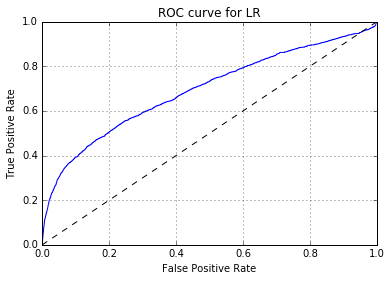

###
AB
###

Time: 60s
Accuracy: 0.94
ROC/AUC Score: 0.61
Classication Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     27960
          1       0.58      0.23      0.33      2040

avg / total       0.92      0.94      0.92     30000




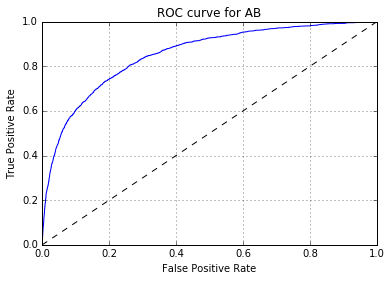

###
RF
###

Time: 206s
Accuracy: 0.94
ROC/AUC Score: 0.58
Classication Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     27960
          1       0.61      0.16      0.26      2040

avg / total       0.92      0.94      0.92     30000




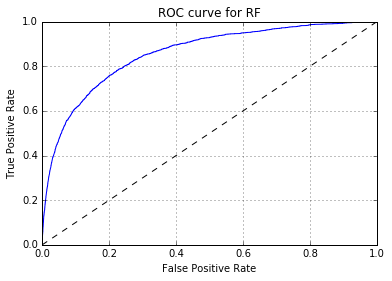

In [15]:
pl.print_full_report(results)

# Pull out best-performing model

In [16]:
best_clf = results['AB']['Best Model']

In [17]:
print(best_clf.best_params_)

{'AB__algorithm': 'SAMME.R', 'AB__n_estimators': 100}


# Read in and fill test data

In [18]:
final_df = pl.read_data('cs-test.csv', INDEX_COL)

In [19]:
pl.fill_test_na_mean(final_df,v)

# Make transformations on features

In [20]:
pl.transform_squared(final_df, 'age', features)
pl.transform_log(final_df, 'MonthlyIncome', features, amt_to_add=1)

# Predict outcomes for test data & write to csv

In [21]:
pl.predict(final_df, features, best_clf)